In [292]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.layers import Input, Dense
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetMobile
from keras.optimizers import Adam, Adadelta
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from skimage import filters
from skimage import data, io
from skimage.feature import hog
from skimage.exposure import rescale_intensity
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

!pip install scikit-image

!pip install opencv-python

In [3]:
## read the files from the directory
PATH =os.getcwd()

In [4]:
# Define data path
data_path = PATH + '/Files/data'
data_dir_list = os.listdir(data_path)

In [5]:
print(data_dir_list)

['cats', 'dogs']


In [15]:
def classify_cats_dogs(scaleFactor=1.05,minNeighbors=5,img_rows=224,img_cols=224):
    ## read images of cats
    img_data_list=[]
    classes_names_list=[]
    for dataset in data_dir_list:
        #print ('Loading images from {} folder\n'.format(dataset)) 
        img_list=os.listdir(data_path+'/'+ dataset)
        for img in img_list:
            classes_names_list.append(dataset) 
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
            img_data_list.append(input_img_resize)
        break
        
    cat_cascade = cv2.CascadeClassifier('D:/INSOFE/Files/haarcascade_frontalcatface_extended.xml')
    cat_cascade_2 = cv2.CascadeClassifier('D:/INSOFE/Files/haarcascade_frontalcatface.xml')
    ## classify cats
    negative=0
    positive=0
    for i in img_data_list:
        gray_img=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    ## list of scale factor
        cats=cat_cascade.detectMultiScale(gray_img,scaleFactor,minNeighbors)
        if len(cats)<1:
            cats_1=cat_cascade_2.detectMultiScale(gray_img,scaleFactor,minNeighbors)
            if len(cats_1)<1:
                negative=negative+1
            else:
                positive=positive+1
        else:
            positive=positive+1
        
    ## read images of dogs
    img_data_list_dogs=[]
    classes_names_list_dogs=[]
    img_list=os.listdir(data_path+'/'+ 'dogs')
    dataset='dogs'
    #print ('Loading images from {} folder\n'.format(dataset)) 
    for img in img_list:
        classes_names_list_dogs.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list_dogs.append(input_img_resize)
    negative_d=0
    positive_d=0
    for i in img_data_list_dogs:
        gray_img=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
        cats=cat_cascade.detectMultiScale(gray_img,scaleFactor,minNeighbors)
        if len(cats)<1:
            cats_1=cat_cascade_2.detectMultiScale(gray_img,scaleFactor,minNeighbors)
            if len(cats_1)<1:
                positive_d=positive_d+1
            else:
                negative_d=negative_d+1
        else:
            negative_d=negative_d+1
            
  ## Accuracy = (tp+tn)/total
    accuracy=(positive+positive_d)/(len(img_data_list)+len(img_data_list_dogs))*100  
    print('Accuracy is {} for scaleFactor {} and minNeighbors {}'.format(accuracy,scaleFactor,minNeighbors))

In [16]:
## Run the Haar Cascade Classifier to classify cars and dogs
## try with differed scaleFactor and minNeighbors
## Best Accuracy is 66.58415841584159 for scaleFactor 1.1 and minNeighbors 5
list_scaleFactor = [1.05, 1.1, 1.15, 1.2]
list_minNeighbors = [5,10,15]
for i in list_scaleFactor:
    for j in list_minNeighbors:
        classify_cats_dogs(i,j)        


Accuracy is 65.84158415841584 for scaleFactor 1.05 and minNeighbors 5
Accuracy is 65.5940594059406 for scaleFactor 1.05 and minNeighbors 10
Accuracy is 64.60396039603961 for scaleFactor 1.05 and minNeighbors 15
Accuracy is 66.58415841584159 for scaleFactor 1.1 and minNeighbors 5
Accuracy is 62.37623762376238 for scaleFactor 1.1 and minNeighbors 10
Accuracy is 57.920792079207914 for scaleFactor 1.1 and minNeighbors 15
Accuracy is 64.35643564356435 for scaleFactor 1.15 and minNeighbors 5
Accuracy is 58.415841584158414 for scaleFactor 1.15 and minNeighbors 10
Accuracy is 55.940594059405946 for scaleFactor 1.15 and minNeighbors 15
Accuracy is 62.87128712871287 for scaleFactor 1.2 and minNeighbors 5
Accuracy is 57.17821782178218 for scaleFactor 1.2 and minNeighbors 10
Accuracy is 54.70297029702971 for scaleFactor 1.2 and minNeighbors 15


In [23]:
## CNN with transfer learning
img_rows=224
img_cols=224
img_data_list=[]
classes_names_list=[]
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)

Loading images from cats folder

Loading images from dogs folder



In [24]:
## verify and scale
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(404, 224, 224, 3)


In [25]:
classes = np.ones((img_data.shape[0],), dtype='int64')
## cats
classes[0:202]=0 
## dogs
classes[202:404]=1

In [26]:
# convert class labels to on-hot encoding
classes = to_categorical(classes, 2)

In [27]:
input_shape = img_data[0].shape

In [28]:
x, y = shuffle(img_data, classes, random_state=123)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [168]:
##Build a new CNN architecture from scatch
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [169]:
## check the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)        0         
__________

In [170]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [173]:
## train the model, accuracy is very low
hist = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 323 samples, validate on 81 samples
Epoch 1/10
323/323 [==============================] - 122s 379ms/step - loss: 0.9794 - acc: 0.5077 - val_loss: 0.6947 - val_acc: 0.4938
Epoch 2/10
323/323 [==============================] - 115s 355ms/step - loss: 0.6957 - acc: 0.4567 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/10
323/323 [==============================] - 112s 346ms/step - loss: 0.6931 - acc: 0.4861 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/10
323/323 [==============================] - 112s 346ms/step - loss: 0.6932 - acc: 0.5031 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 5/10
323/323 [==============================] - 116s 358ms/step - loss: 0.6934 - acc: 0.4861 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 6/10
323/323 [==============================] - 124s 384ms/step - loss: 0.6932 - acc: 0.5062 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/10
323/323 [==============================] - 115s 355ms/step - loss: 0.6932 - acc: 0.4969 - val_loss: 0.6932 - val_acc: 0.4938
Epo

In [46]:
## use transfer learning -- VGGNET and train only the last 3 layers
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

In [47]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
## Customize the fully connected layers
x = Dense(64, activation='relu', name='fc1')(x)
x = Dense(32, activation='relu', name='fc2')(x)
out = Dense(2, activation='sigmoid', name='output')(x)
cnn_vgg_model = Model(image_input, out)

In [49]:
## update the trainable parameters to false
for layer in cnn_vgg_model.layers[:-3]:
    layer.trainable = False

In [50]:
cnn_vgg_model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [51]:
## Verify the model
cnn_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [52]:
## train the model
hist = cnn_vgg_model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(x_test, y_test))

Train on 323 samples, validate on 81 samples
Epoch 1/2
323/323 [==============================] - 250s 775ms/step - loss: 1.0453 - acc: 0.5062 - val_loss: 0.7405 - val_acc: 0.5062
Epoch 2/2
323/323 [==============================] - 213s 660ms/step - loss: 0.5706 - acc: 0.7307 - val_loss: 0.4737 - val_acc: 0.8333


In [53]:
## Accuracy improved to 83%
(loss, accuracy) = cnn_vgg_model.evaluate(x_test, y_test)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

81/81 [==============================] - 44s 547ms/step
[INFO] loss=0.4737, accuracy: 83.3333%


In [58]:
## Use transfer learning -- NASNetMobile
image_input = Input(shape=(224, 224, 3))
model = NASNetMobile(input_tensor=image_input, include_top=True, weights='imagenet')

24231936/24227760 [==============================] - 37s 2us/step


In [59]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_238 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

normal_right4_3 (AveragePooling (None, 28, 28, 44)   0           adjust_bn_3[0][0]                
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 28, 28, 44)   176         separable_conv_2_normal_left5_3[0
__________________________________________________________________________________________________
normal_add_1_3 (Add)            (None, 28, 28, 44)   0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_3 (Add)            (None, 28, 28, 44)   0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add

__________________________________________________________________________________________________
activation_355 (Activation)     (None, 14, 14, 528)  0           normal_concat_7[0][0]            
__________________________________________________________________________________________________
adjust_conv_projection_8 (Conv2 (None, 14, 14, 88)   46464       activation_354[0][0]             
__________________________________________________________________________________________________
normal_conv_1_8 (Conv2D)        (None, 14, 14, 88)   46464       activation_355[0][0]             
__________________________________________________________________________________________________
adjust_bn_8 (BatchNormalization (None, 14, 14, 88)   352         adjust_conv_projection_8[0][0]   
__________________________________________________________________________________________________
normal_bn_1_8 (BatchNormalizati (None, 14, 14, 88)   352         normal_conv_1_8[0][0]            
__________

normal_add_4_11 (Add)           (None, 7, 7, 176)    0           normal_left4_11[0][0]            
                                                                 normal_right4_11[0][0]           
__________________________________________________________________________________________________
normal_add_5_11 (Add)           (None, 7, 7, 176)    0           separable_conv_2_bn_normal_left5_
                                                                 normal_bn_1_11[0][0]             
__________________________________________________________________________________________________
normal_concat_11 (Concatenate)  (None, 7, 7, 1056)   0           adjust_bn_11[0][0]               
                                                                 normal_add_1_11[0][0]            
                                                                 normal_add_2_11[0][0]            
                                                                 normal_add_3_11[0][0]            
          

In [65]:
last_layer = model.get_layer('global_average_pooling2d_1').output
## Customize the fully connected layers
x = Dense(64, activation='relu', name='fc1')(last_layer)
x = Dense(32, activation='relu', name='fc2')(x)
#x = Dropout(0.5)(x)
out = Dense(2, activation='sigmoid', name='output')(x)
cnn_nasnet_model = Model(image_input, out)
## we will update the trainable parameters to false for the last 3 layers
for layer in cnn_nasnet_model.layers[:-3]:
    layer.trainable = False
cnn_nasnet_model.compile(Adadelta(lr=1e-1), loss='binary_crossentropy', metrics=['accuracy'])
## Verify the model
cnn_nasnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_238 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

activation_344 (Activation)     (None, 14, 14, 88)   0           normal_bn_1_7[0][0]              
__________________________________________________________________________________________________
activation_346 (Activation)     (None, 14, 14, 88)   0           adjust_bn_7[0][0]                
__________________________________________________________________________________________________
activation_348 (Activation)     (None, 14, 14, 88)   0           adjust_bn_7[0][0]                
__________________________________________________________________________________________________
activation_350 (Activation)     (None, 14, 14, 88)   0           adjust_bn_7[0][0]                
__________________________________________________________________________________________________
activation_352 (Activation)     (None, 14, 14, 88)   0           normal_bn_1_7[0][0]              
__________________________________________________________________________________________________
separable_

normal_concat_8 (Concatenate)   (None, 14, 14, 528)  0           adjust_bn_8[0][0]                
                                                                 normal_add_1_8[0][0]             
                                                                 normal_add_2_8[0][0]             
                                                                 normal_add_3_8[0][0]             
                                                                 normal_add_4_8[0][0]             
                                                                 normal_add_5_8[0][0]             
__________________________________________________________________________________________________
activation_367 (Activation)     (None, 14, 14, 528)  0           normal_concat_8[0][0]            
__________________________________________________________________________________________________
activation_366 (Activation)     (None, 14, 14, 528)  0           normal_concat_7[0][0]            
__________

                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_12 (Add)           (None, 7, 7, 176)    0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add_3_12 (Add)           (None, 7, 7, 176)    0           normal_left3_12[0][0]            
                                                                 adjust_bn_12[0][0]               
__________________________________________________________________________________________________
normal_add_4_12 (Add)           (None, 7, 7, 176)    0           normal_left4_12[0][0]            
                                                                 normal_right4_12[0][0]           
__________

In [66]:
## train the model, Accuracy -- 93.8%
hist_nasnet = cnn_nasnet_model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(x_test, y_test))

Train on 323 samples, validate on 81 samples
Epoch 1/2
323/323 [==============================] - 164s 508ms/step - loss: 0.6602 - acc: 0.5851 - val_loss: 0.5907 - val_acc: 0.8272
Epoch 2/2
323/323 [==============================] - 143s 441ms/step - loss: 0.5847 - acc: 0.7926 - val_loss: 0.4905 - val_acc: 0.9383


In [ ]:
## Now we will use some Feature Extraction techniques and traditional ML algorithms (SVM) to classify

In [82]:
## Feature extraction of images using HOG (histogram of oriented gradients)
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
   
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)

        return features

In [83]:
## Spatial binning -- downsize the resolution to retain the most important image characteristic in terms of raw pixel values
def bin_spatial(img, size=(32, 32)):
    ## different color channels R, G, B    
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    features= np.hstack((color1, color2, color3))
    return features

In [84]:
## more features -- histogram of color intensities -- might add value 
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels  R, G, B separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))

    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [85]:
## add blurring as we want to focus on only the cat/dog in the picture
def blurr_image(img, sigma=20):
    blurred_img=filters.gaussian(img,sigma)
    feature_blurr = blurred_img.ravel()
    #show_images(images=[img, blurred_img],titles=['original','blurred']) 
    return feature_blurr    

In [192]:
## add filtering using gabor for edge detection and texture classification
def gaborfilter_image(img, frequency=0.6):
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    filt_real, filt_imag = filters.gabor(gray_img, frequency=frequency)
    feature_gabor=filt_real.ravel()
    #plt.figure()
    #io.imshow(filt_real)
    #io.show()
    return feature_gabor

In [97]:
## more features from the contour
img_dog1=cv2.imread('D:/INSOFE/Files/data/dogs/dog.43.jpg',1)
img_cat1=cv2.imread('D:/INSOFE/Files/data/cats/cat.6.jpg',1)

In [98]:
img_dog1.shape

(249, 375, 3)

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


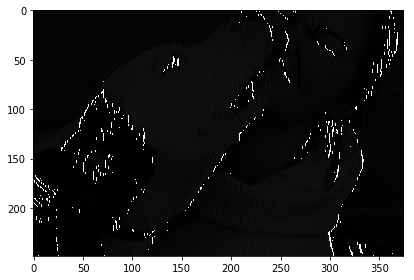

In [99]:
gray_img=cv2.cvtColor(img_dog1,cv2.COLOR_BGR2GRAY)
filt_real, filt_imag = filters.gabor(gray_img, frequency=0.6)
plt.figure()
io.imshow(filt_real)
io.show() 

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


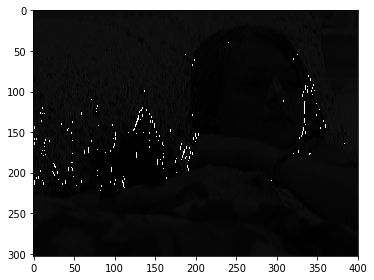

In [100]:
gray_img=cv2.cvtColor(img_cat1,cv2.COLOR_BGR2GRAY)
filt_real, filt_imag = filters.gabor(gray_img, frequency=0.6)
plt.figure()
io.imshow(filt_real)
io.show() 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


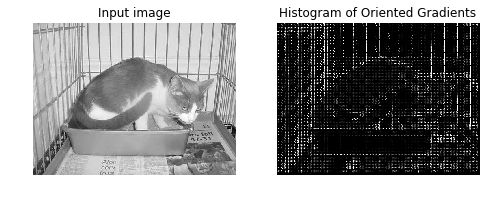

In [146]:
img_cat2=cv2.imread('D:/INSOFE/Files/data/cats/cat.67.jpg',1)
gray_img=cv2.cvtColor(img_cat2,cv2.COLOR_BGR2GRAY)
#get_hog_features(gray_img, 9, 8, 2, vis=False, feature_vec=True)
fd, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2,2), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [87]:
## Now for each image form the feature vector and the class labels
img_rows=224
img_cols=224
img_data_list_HOG=[]
classes_names_list=[]
## 26244 features
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        gray_img=cv2.cvtColor(input_img_resize,cv2.COLOR_BGR2GRAY)
        feature_HOG=get_hog_features(gray_img, 9, 8, 2, vis=False, feature_vec=True)
        img_data_list_HOG.append(feature_HOG)

print('Featurs created {}'.format(len(img_data_list_HOG[0])))

Loading images from cats folder



D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Loading images from dogs folder

Featurs created 26244


In [88]:
img_rows=224
img_cols=224
img_data_list_spatial=[]
classes_names_list=[]
## 3072 features
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        #gray_img=cv2.cvtColor(input_img_resize,cv2.COLOR_BGR2GRAY)
        feature_spatial=bin_spatial(input_img_resize, size=(32, 32))
        img_data_list_spatial.append(feature_spatial)
        
print('Featurs created {}'.format(len(img_data_list_spatial[0])))        

Loading images from cats folder

Loading images from dogs folder

Featurs created 3072


In [89]:
img_rows=224
img_cols=224
img_data_list_colhist=[]
classes_names_list=[]
## 96 features
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        #gray_img=cv2.cvtColor(input_img_resize,cv2.COLOR_BGR2GRAY)
        feature_color_hist=color_hist(input_img_resize, nbins=32, bins_range=(0, 256))
        img_data_list_colhist.append(feature_color_hist)
        
print('Featurs created {}'.format(len(img_data_list_colhist[0])))       

Loading images from cats folder

Loading images from dogs folder

Featurs created 96


In [115]:
img_rows=224
img_cols=224
img_data_list_blurr=[]
classes_names_list=[]
## 50176 features
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        gray_img=cv2.cvtColor(input_img_resize,cv2.COLOR_BGR2GRAY)
        feature_blurr=blurr_image(gray_img, sigma=20)
        img_data_list_blurr.append(feature_blurr)
        
print('Featurs created {}'.format(len(img_data_list_blurr[0])))              

Loading images from cats folder

Loading images from dogs folder

Featurs created 50176


In [201]:
img_rows=224
img_cols=224
img_data_list_gabor=[]
classes_names_list=[]
## 50176 features
for dataset in data_dir_list:
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        classes_names_list.append(dataset) 
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        feature_gabor=gaborfilter_image(input_img_resize, frequency=0.3)
        img_data_list_gabor.append(feature_gabor)
        
print('Featurs created {}'.format(len(img_data_list_gabor[0])))          

Loading images from cats folder

Loading images from dogs folder

Featurs created 50176


In [80]:
target_dict = {'cats':0 , 'dogs':1}
labels = [target_dict.get(i) for i in classes_names_list]

In [208]:
#concatenate all the features
feature_vector= np.concatenate((img_data_list_HOG,img_data_list_spatial,img_data_list_colhist
                                ,img_data_list_blurr,img_data_list_gabor),axis=1 )

In [209]:
#verify
feature_vector.shape

(404, 129764)

In [210]:
## normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_vector)

In [234]:
x, y = shuffle(scaled_features, labels, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [235]:
## train an SVC classifier
svm_model = SVC(C=10, kernel='linear', max_iter=1000, random_state=786)
svm_model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=786, shrinking=True,
  tol=0.001, verbose=False)

In [236]:
## check accuracy and confusion matrix
train_accuracy= svm_model.score(x_train,y_train)
test_accuracy= svm_model.score(x_test,y_test)
predictions=svm_model.predict(x_test)
print(train_accuracy)
print(round(test_accuracy,2))
confusionMatrix = confusion_matrix(y_pred=predictions,y_true=y_test)
print(confusionMatrix)
print(classification_report(y_test, predictions))

1.0
0.7
[[42 17]
 [20 43]]
             precision    recall  f1-score   support

          0       0.68      0.71      0.69        59
          1       0.72      0.68      0.70        63

avg / total       0.70      0.70      0.70       122



In [271]:
## use XGBoost
model_xgb = XGBClassifier(booster='gbtree',objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth=5, n_estimators = 150, metrics='accuracy')

model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, metrics='accuracy', min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [272]:
## check accuracy and confusion matrix
train_accuracy= model_xgb.score(x_train,y_train)
test_accuracy= model_xgb.score(x_test,y_test)
predictions=model_xgb.predict(x_test)
print(train_accuracy)
print(round(test_accuracy,2))
confusionMatrix = confusion_matrix(y_pred=predictions,y_true=y_test)
print(confusionMatrix)
print(classification_report(y_test, predictions))

1.0
0.66
[[41 18]
 [24 39]]
             precision    recall  f1-score   support

          0       0.63      0.69      0.66        59
          1       0.68      0.62      0.65        63

avg / total       0.66      0.66      0.66       122



In [273]:
## use XGBoost with linear
model_xgb_l = XGBClassifier(booster='gblinear',objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                          n_estimators = 20, metrics='accuracy')

model_xgb_l.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, metrics='accuracy', min_child_weight=1, missing=None,
       n_estimators=20, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [274]:
## check accuracy and confusion matrix
train_accuracy= model_xgb_l.score(x_train,y_train)
test_accuracy= model_xgb_l.score(x_test,y_test)
predictions=model_xgb_l.predict(x_test)
print(train_accuracy)
print(round(test_accuracy,2))
confusionMatrix = confusion_matrix(y_pred=predictions,y_true=y_test)
print(confusionMatrix)
print(classification_report(y_test, predictions))

1.0
0.7
[[41 18]
 [19 44]]
             precision    recall  f1-score   support

          0       0.68      0.69      0.69        59
          1       0.71      0.70      0.70        63

avg / total       0.70      0.70      0.70       122



In [313]:
## use kNN Classification
knn_model = KNeighborsClassifier(n_neighbors=10)  
knn_model.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [314]:
## check accuracy and confusion matrix
train_accuracy= knn_model.score(x_train,y_train)
test_accuracy= knn_model.score(x_test,y_test)
predictions=knn_model.predict(x_test)
print(train_accuracy)
print(round(test_accuracy,2))
confusionMatrix = confusion_matrix(y_pred=predictions,y_true=y_test)
print(confusionMatrix)
print(classification_report(y_test, predictions))

0.6099290780141844
0.57
[[57  2]
 [51 12]]
             precision    recall  f1-score   support

          0       0.53      0.97      0.68        59
          1       0.86      0.19      0.31        63

avg / total       0.70      0.57      0.49       122



In [303]:
data_path

'D:\\INSOFE/Files/data'

In [276]:
## Data Augmentation and ResNet50
DATASET_PATH  = data_path
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = 2

In [304]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=32)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/valid',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=32)

Found 310 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [293]:
image_input = Input(shape=(224, 224, 3))
model = ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

In [294]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [295]:
last_layer = model.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
## Customize the fully connected layers
x = Dense(64, activation='relu', name='fc1')(x)
x = Dense(32, activation='relu', name='fc2')(x)
out = Dense(2, activation='sigmoid', name='output')(x)
cnn_resnet_model = Model(image_input, out)

In [296]:
## update the trainable parameters to false
for layer in cnn_resnet_model.layers[:-3]:
    layer.trainable = False
cnn_resnet_model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
## Verify the model
cnn_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [306]:
BATCH_SIZE=32
cnn_resnet_model.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        epochs = 2)

Epoch 1/2
9/9 [==============================] - 361s 40s/step - loss: 0.1681 - acc: 0.9338 - val_loss: 0.0779 - val_acc: 0.9681
Epoch 2/2
9/9 [==============================] - 337s 37s/step - loss: 0.1302 - acc: 0.9456 - val_loss: 0.0825 - val_acc: 0.9681
